# Loan Prediction Using Keras Functional API

By Adam Lang
* Date: February 16, 2024
* In this notebook I will demonstrate again training a neural network using Keras and Tensorflow.
* We will use the same structured data from the previous notebook.
* However, this time we will us the Keras Functional API to build 2 concurrent hidden layers in the neural network.

Problem Statement: Loan Prediction
* Based on customer details in the tabular data set, predict whether we should approve a loan for each customer or not.
* Binary classification problem (Y approved, N not approved)
* Target dependent variable: 'Loan_Status'

# Concept of Functional API in Keras

Keras documentation: https://keras.io/guides/functional_api/

* The Keras functional API is a way to create models that are more flexible than the `keras.Sequential` API.
* The functional API can handle models with `non-linear` topology, `shared layers`, and even `multiple inputs or outputs`.
* The main idea is that a deep learning model is usually a directed acyclic graph (DAG) of layers.
* The functional API is a way to build `graphs of layers.`

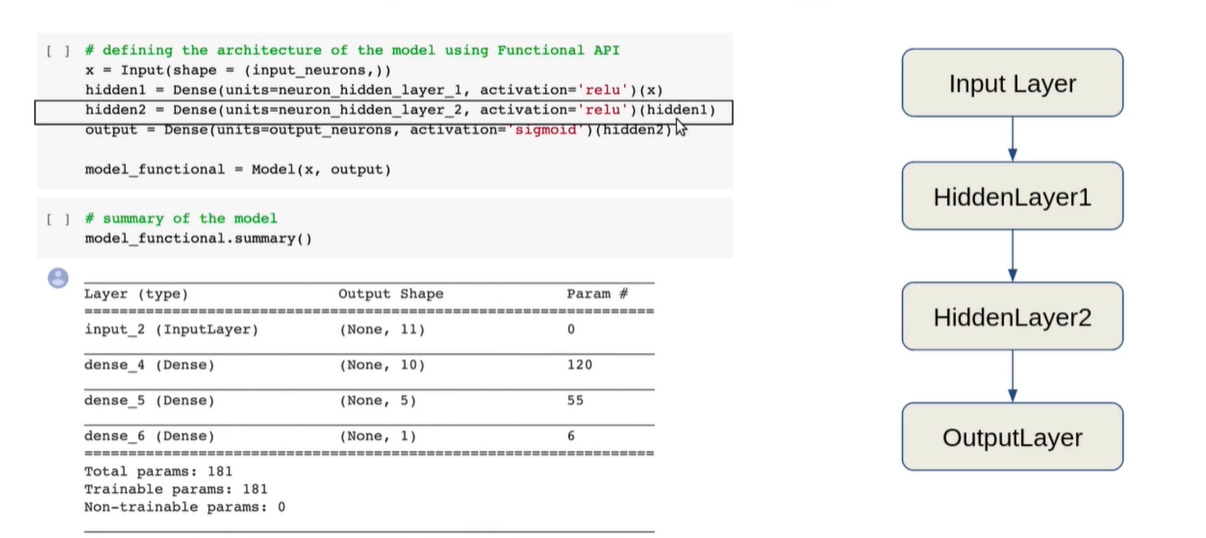

### Steps to build a Neural Network using Keras

1. Loading dataset
2. Creating training and validation set
3. Defining the architecture of the model
4. Compiling the model (defining loss function, optimizer)
5. Training the model
6. Evaluating model performance on training and validation set

# 1. Loading the dataset

In [2]:
# importing required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# load pre-processed data
data = pd.read_csv('/content/drive/MyDrive/Analytics_Vidhya_LLM_GenAI/loan_prediction_pre-processed.csv')

In [4]:
# first 5 rows
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [5]:
# check missing values
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [6]:
# check data types
data.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [7]:
# remove loan_ID since these are unique values (objects)
data = data.drop('Loan_ID', axis=1)

In [8]:
# look at shape of data
data.shape

(614, 12)

summary: 614 rows, 12 columns

In [11]:
# separating the independent and dependent variables

# storing all independent variables as X
X = data.drop('Loan_Status', axis=1)

# storing the dependent variable as y
y = data['Loan_Status']

In [12]:
# shape of independent and dependent variables
X.shape, y.shape

((614, 11), (614,))

# 2. Creating training and validation set

In [13]:
# create training and validation set

# stratify makes sure that distribution of classes in train and validation set are similar
# random state used to regenerate same train and validation set
# test size 0.2 will keep 20% of data in validation and reamining 80% in train set

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=data['Loan_Status'], random_state=10, test_size=0.2)

In [14]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((491, 11), (491,)), ((123, 11), (123,)))

# 3. Defining architecture of model

In [15]:
# import keras
import keras

# importing sequential model
from keras.models import Sequential

# importing different layers from keras
from keras.layers import InputLayer, Dense

In [16]:
# number of input neurons
X_train.shape

(491, 11)

In [17]:
# number of features in data
X_train.shape[1]

11

In [18]:
# defining input neurons - input neurons is equal to num of features in data
input_neurons = X_train.shape[1]

# define number of output neurons - binary classification thus output is 1
output_neurons = 1

In [19]:
# define hidden layers and neuron in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

### Define model architecture

In [20]:
# defining architecture of model using Keras Sequential API
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

In [21]:
# summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 181 (724.00 Byte)
Trainable params: 181 (724.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Now, define same model architecture but with Keras API

In [22]:
from keras import Input, Model

In [23]:
# define architecture of model using Functional API from Keras
x = Input(shape = (input_neurons,))
hidden1 = Dense(units=neuron_hidden_layer_1, activation='relu')(x) #input is output from previous layer
hidden2 = Dense(units=neuron_hidden_layer_2, activation='relu')(hidden1) #input is output from previous layer
output = Dense(units=output_neurons, activation='sigmoid')(hidden2) #input is output from previous layer

model_functional = Model(x, output)

In [24]:
# summary of the model
model_functional.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 11)]              0         
                                                                 
 dense_3 (Dense)             (None, 10)                120       
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 181 (724.00 Byte)
Trainable params: 181 (724.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


summary: Even though the architecture above used the Functional API from Keras, the output params are the same.

# 4. Compiling the model (defining loss function, optimizer)

In [25]:
# compiling the model

# loss as binary_crossentropy, since we have binary classification problem
# defining the optimizer as adam
# Evaluation metric as accuracy

model_functional.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# 5. Training the model

In [26]:
# training the model

# passing the independent and dependent features for training set for training the model

# validation data will be evaluated at end of each epoch

# setting epochs at 50

# storing the trained model in model_history variable which will be used to visualize the training process

model_history = model_functional.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)


Epoch 1/50
16/16 [==============================] - 4s 68ms/step - loss: 0.7748 - accuracy: 0.3075 - val_loss: 0.7398 - val_accuracy: 0.3252
Epoch 2/50
16/16 [==============================] - 0s 20ms/step - loss: 0.7269 - accuracy: 0.3442 - val_loss: 0.7092 - val_accuracy: 0.3902
Epoch 3/50
16/16 [==============================] - 0s 9ms/step - loss: 0.6995 - accuracy: 0.4501 - val_loss: 0.6868 - val_accuracy: 0.5203
Epoch 4/50
16/16 [==============================] - 0s 14ms/step - loss: 0.6798 - accuracy: 0.6171 - val_loss: 0.6695 - val_accuracy: 0.6992
Epoch 5/50
16/16 [==============================] - 0s 11ms/step - loss: 0.6617 - accuracy: 0.6904 - val_loss: 0.6543 - val_accuracy: 0.6911
Epoch 6/50
16/16 [==============================] - 0s 10ms/step - loss: 0.6463 - accuracy: 0.6884 - val_loss: 0.6386 - val_accuracy: 0.6911
Epoch 7/50
16/16 [==============================] - 0s 14ms/step - loss: 0.6286 - accuracy: 0.6864 - val_loss: 0.6244 - val_accuracy: 0.6911
Epoch 8/50
16/

# 6. Evaluating model performance on validation set

In [27]:
# getting predictions for the validation set
prediction = model_functional.predict(X_test)

4/4 [==============================] - 0s 5ms/step


In [32]:
prediction = prediction.reshape(123,)

# converting probabilities to classes
prediction_int = prediction >= 0.5
prediction_int = prediction_int.astype(np.int64)

In [33]:
# calculating accuracy on validation set
accuracy_score(y_test, prediction_int)

0.8130081300813008

summary: accuracy is 81%

# Visualizing model performance

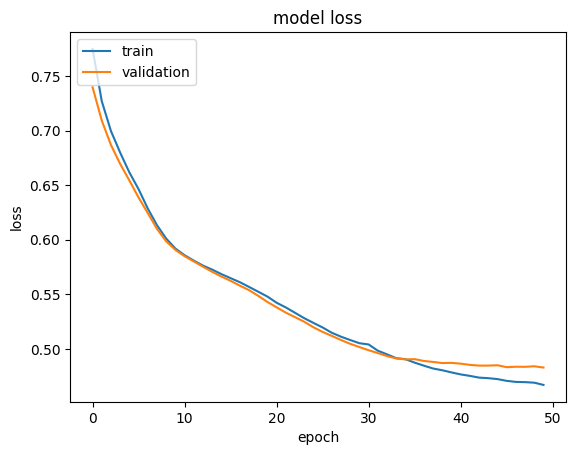

In [35]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

summary: loss continues to decrease with each training epoch.

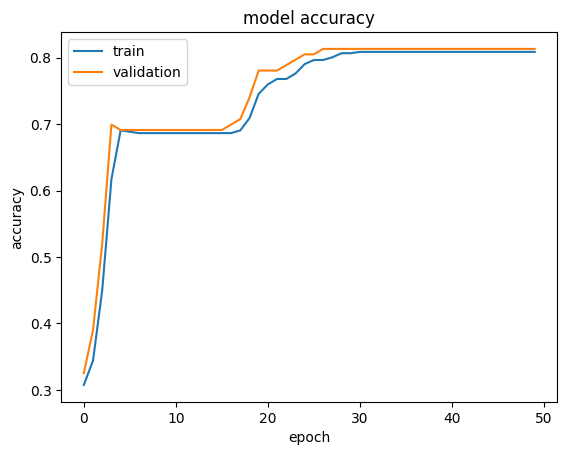

In [37]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

summary: accuracy increases and then levels off at about 30 epochs.